In [1]:
!pip install GPy

     |████████████████████████████████| 959 kB 4.4 MB/s 
     |████████████████████████████████| 71 kB 7.0 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565091 sha256=fac917c9eff8232cb0fb157a27561e1f2f8a0fdc5b49d153d9aeb9bc3fbd1a24
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=f5daba20fe9eca1f0bcf635d9fb707614145d72a343e55572be57a2bce8d1069
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy
from sklearn.datasets import make_gaussian_quantiles

In [38]:
from sklearn.datasets import make_circles
from sklearn import svm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def apply_nonlinear(X,ratio):
    X1 = X[:,0]
    X2 = X[:,1]
    
    X3 = X1**ratio + X2**ratio        
    X_ = np.zeros((X.shape[0],3))    
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_
def plot3d(X,title,ax_):    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    ax_.set_title(title,fontsize=25)
    
    ax_.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=False)    
    return ax_

def apply_SVC_kernel(X,Y,kernel_type):
  svc = svm.SVC(kernel=kernel_type)
  svc.fit(X,Y)
  return svc.score(X,Y)


def apply_ratios(X_orig,ratios):
  fig = plt.figure(figsize=(50,10))
  for i,ratio in enumerate(ratios):
    X = apply_nonlinear(X_orig,ratio)    
    plot_index = 100+10*len(ratios)+i+1
    ax = fig.add_subplot(plot_index,projection='3d')  
    rbf_score = apply_SVC_kernel(X,Y,"rbf")  
    linear_score = apply_SVC_kernel(X,Y,"linear")  
    sigmoid_score = apply_SVC_kernel(X,Y,"sigmoid")
    poly_score = apply_SVC_kernel(X,Y,"poly")
    title = f"Ratio:{ratio} \n RBF {rbf_score} Lin {linear_score} Sigmo {sigmoid_score} Poly {poly_score}"
    
    plot3d(X,title,ax)
  



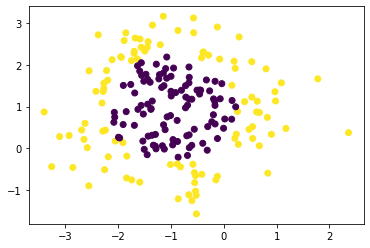

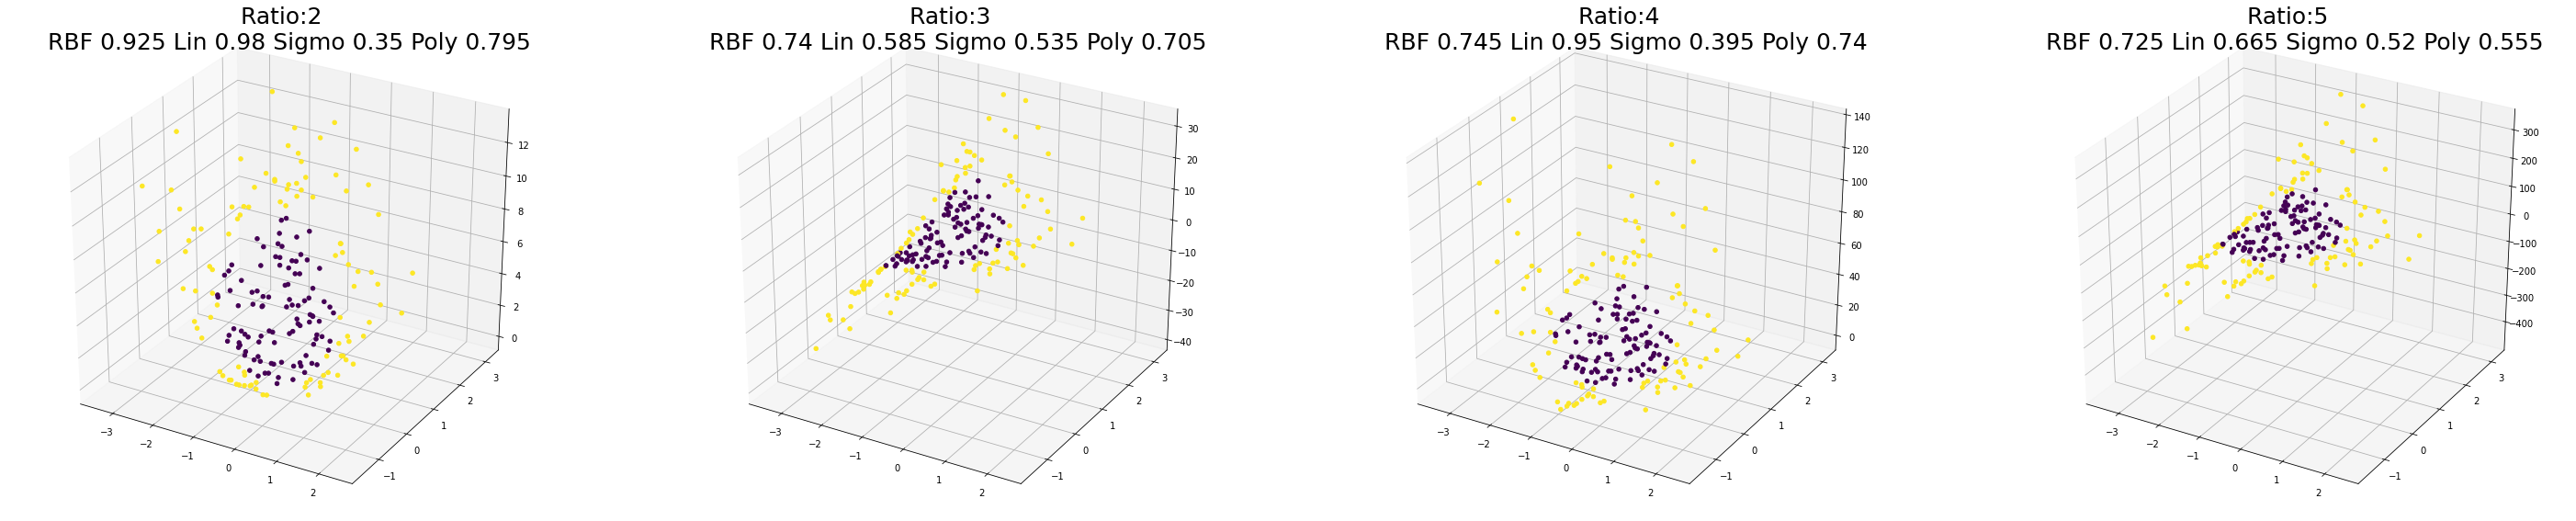

In [39]:
X, Y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=200, mean=(-1,1))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
apply_ratios(X,[2,3,4,5])

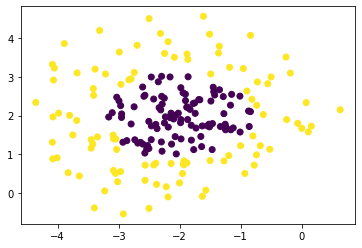

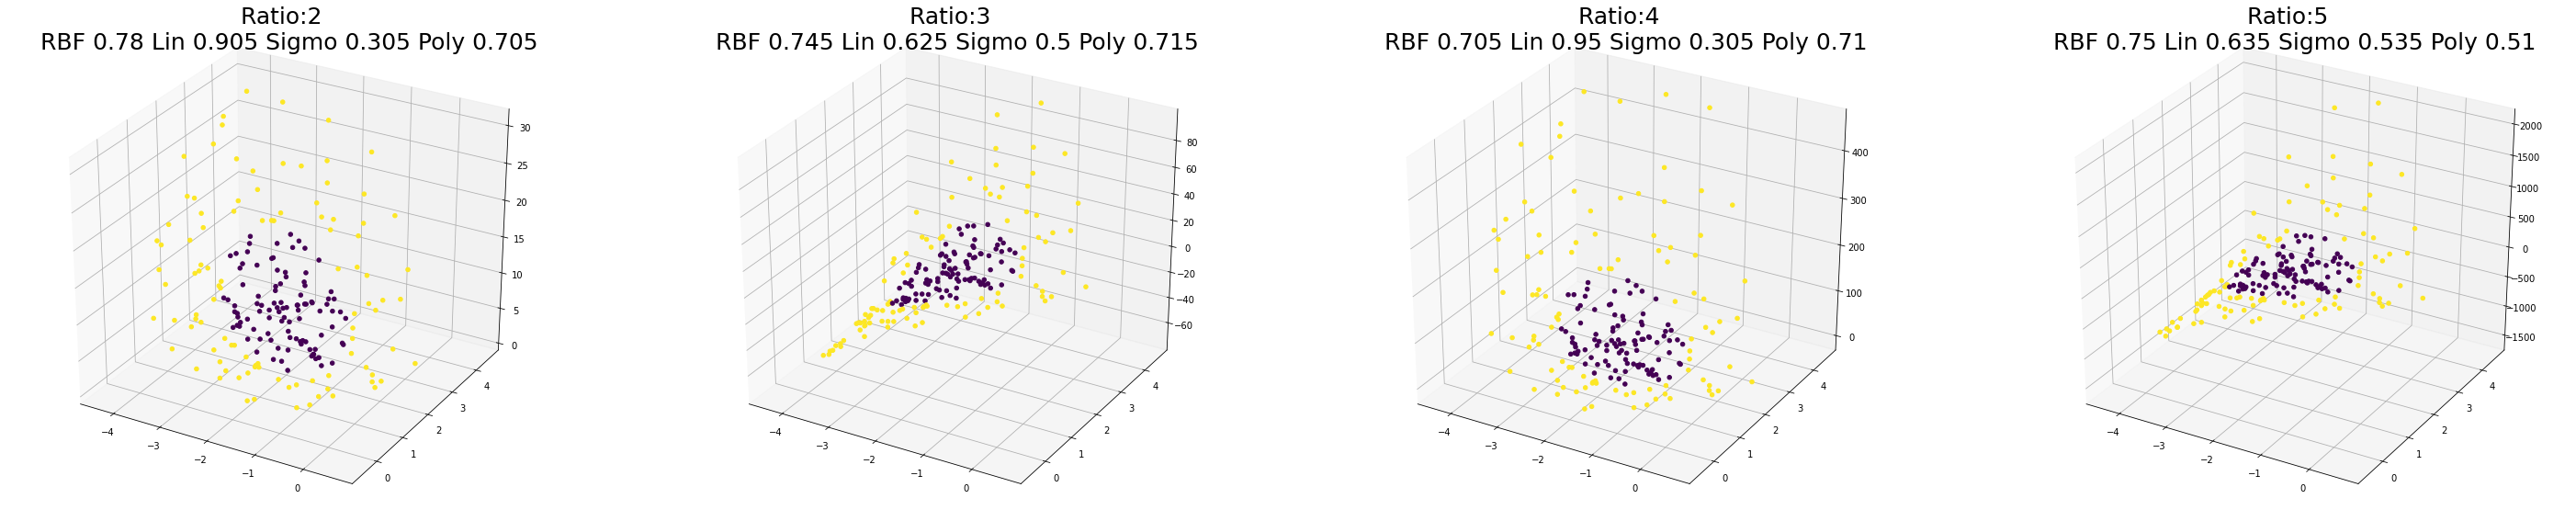

In [40]:
X, Y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=200, mean=(-2,2))
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

apply_ratios(X,[2,3,4,5])

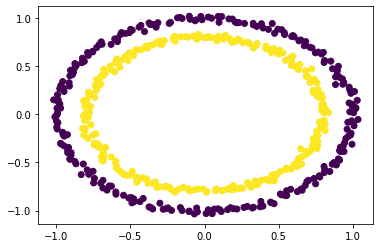

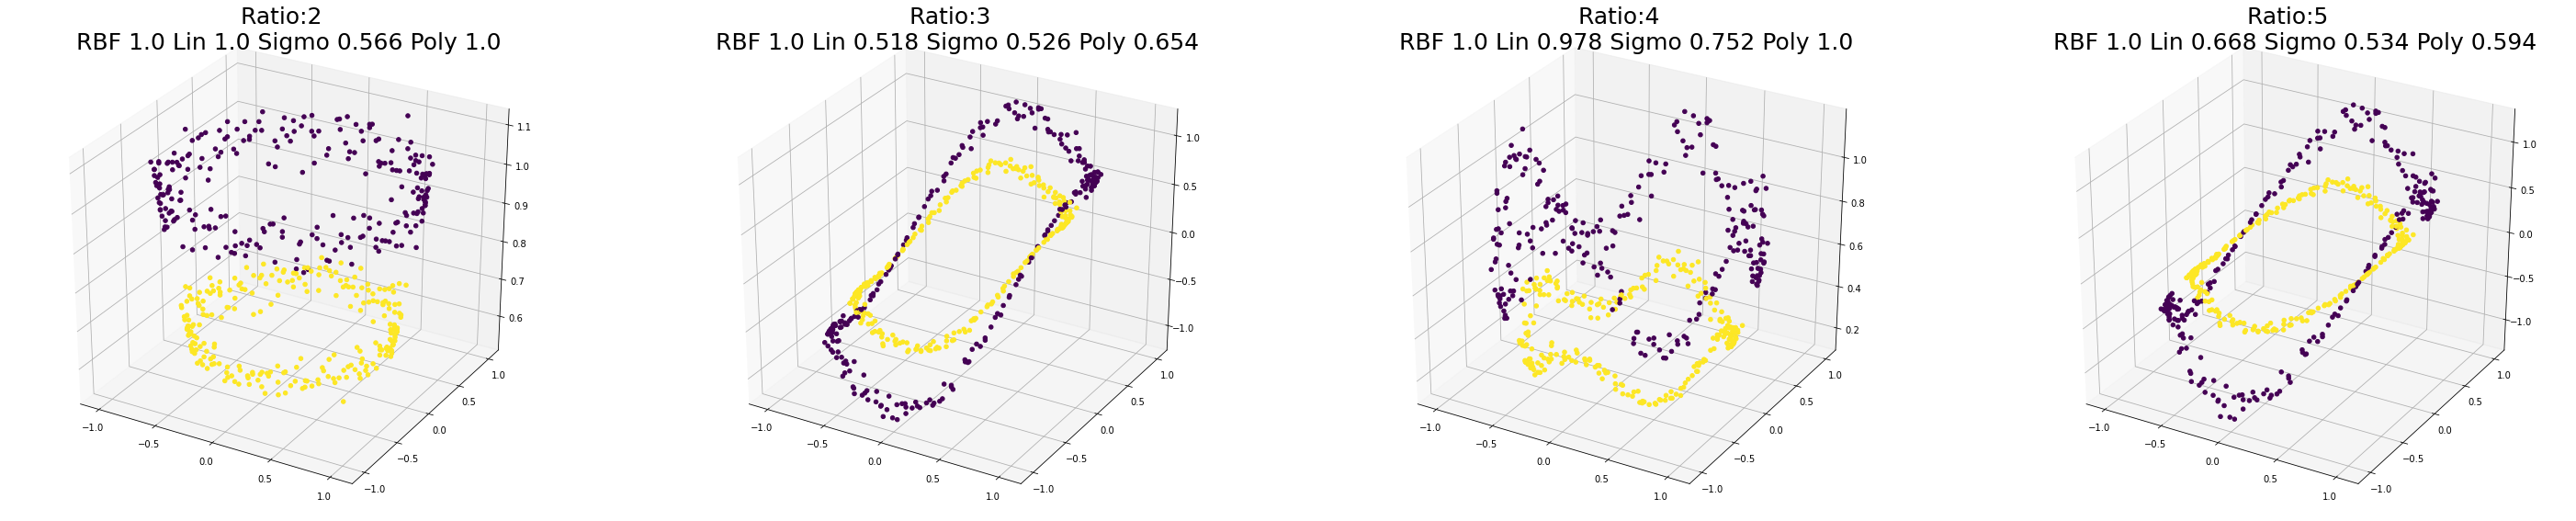

In [41]:
X,Y = make_circles(n_samples=500,noise=0.02)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
apply_ratios(X,[2,3,4,5])

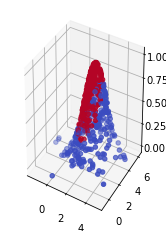

In [42]:
#def __init__(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0))
from sklearn.gaussian_process.kernels import RBF
X, Y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=500, mean=(2,3))

z = RBF(1.0).__call__(X)[0]

fig = plt.figure()
ax3 = fig.add_subplot(121, projection='3d')
colors = {0: '#b40426',1: '#3b4cc0',2: '#f2da0a',3: '#fe5200'}
# Plot
colors = list(map(lambda x: colors[x], Y))
ax3.scatter(X[:, 0], X[:, 1], z, c=colors, marker='o')


plt.show()